<a href="https://colab.research.google.com/github/ykitaguchi77/CorneAI/blob/main/Generate_normal_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stable diffusionのファインチューニングでnormalの画像を作成したときの精度評価**

https://www.notion.so/Stable-diffusion-Lora-bc9427134dcd4596badd624720cc365d

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**尤度で評価**

CorneAIに画像入り(100枚)のフォルダを投入し、各クラスの尤度を計算する。今回は正常画像のトレーニングなので、正常と判定される尤度をピックアップし、平均+-標準偏差を算出する

In [2]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_dir = "/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/画像生成/sltphoto_normal"
csv_files = glob.glob(f"{data_dir}/*")
csv_files


#**グラフ描画用**

In [ ]:
import os
import pandas as pd
import numpy as np

# Empty list to store dataframes
dfs = []

# Read each csv file, add 'step' and 'negative_prompt' columns based on file name, and append to the list
for file in csv_files:
    df = pd.read_csv(file, encoding='cp932')

    # Get the step number and negative prompt flag from the file name
    filename = os.path.splitext(os.path.basename(file))[0]

    if "negative" in filename:
        step = int(filename.split("_")[0])
        negative_prompt = True
    else:
        try:
            step = int(filename.split("_")[0])
            negative_prompt = False
        except:
            step = "GroundTruth"
            negative_prompt = False

    # Add 'step' and 'negative_prompt' columns
    df['step'] = step
    df['negative_prompt'] = negative_prompt

    dfs.append(df)

# Concatenate all dataframes
df_combined = pd.concat(dfs, ignore_index=True)

# Calculate mean, standard deviation, quartiles, minimum, and maximum of '正常' score for each combination of 'step' and 'negative_prompt'
grouped_stats_df = df_combined.groupby(['step', 'negative_prompt'])['正常'].agg(['mean', 'std', 'min', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 50), lambda x: np.percentile(x, 75), 'max']).reset_index()

# Rename the quartiles columns
grouped_stats_df.rename(columns={'<lambda_0>': 'Q1', '<lambda_1>': 'Q2 (Median)', '<lambda_2>': 'Q3'}, inplace=True)

# Display the results
grouped_stats_df


,step,negative_prompt,mean,std,min,Q1,Q2 (Median),Q3,max
0,150,False,0.190980,0.314076,0.000000,0.000000,0.000000,0.420673,0.925443
1,150,True,0.245239,0.325649,0.000000,0.000000,0.000813,0.511942,0.937532
2,300,False,0.566400,0.388795,0.000000,0.000869,0.744811,0.906414,0.971595
3,300,True,0.485135,0.355903,0.000000,0.006016,0.537518,0.804759,0.972230
4,600,False,0.736174,0.299698,0.000000,0.698882,0.874291,0.926256,0.979468
5,600,True,0.815466,0.255144,0.000000,0.800821,0.923941,0.957291,0.978252
6,1200,False,0.786072,0.298104,0.000000,0.809716,0.923026,0.959187,0.978387
7,1200,True,0.956312,0.034144,0.734255,0.951289,0.965965,0.973537,0.982379
8,2400,False,0.928504,0.153809,0.000000,0.949607,0.967663,0.974120,0.982746
9,2400,True,0.952455,0.049555,0.607555,0.954182,0.967768,0.973410,0.981473


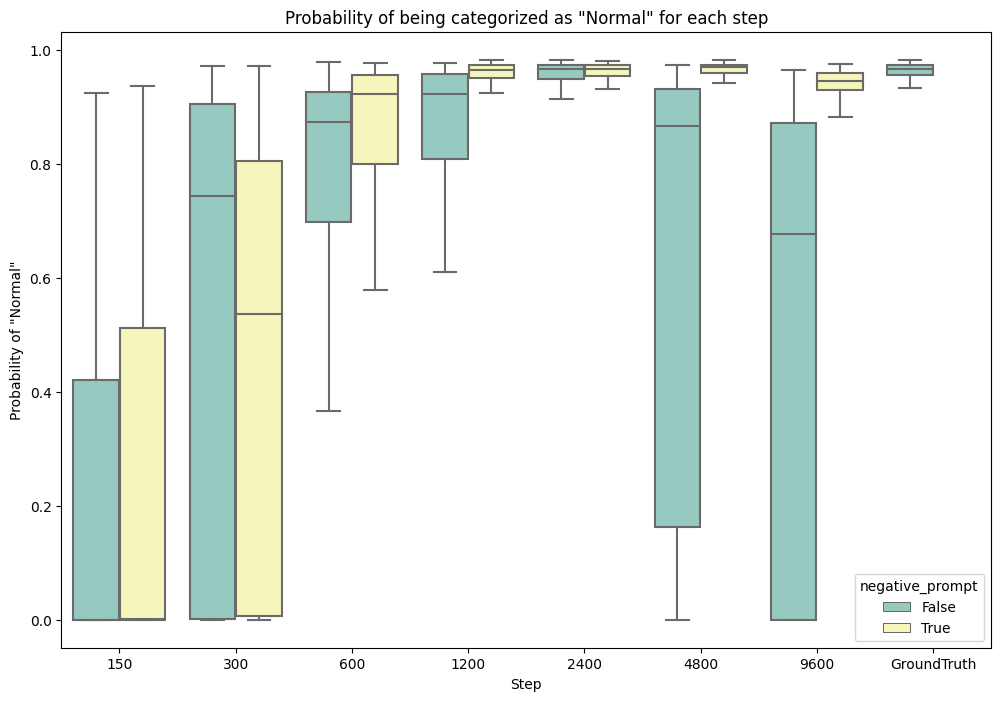

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='step', y='正常', hue='negative_prompt', data=df_combined, palette="Set3", showfliers = False)
plt.title('Probability of being categorized as "Normal" for each step')
plt.xlabel('Step')
plt.ylabel('Probability of "Normal"')
plt.show()


In [ ]:
df_combined

In [ ]:
df_combined.to_csv("df_combined.csv", encoding="shift-jis")

###**各ステップ数における尤度の比較**



In [ ]:
df = df_combined

In [ ]:
df

,ファイル名,正常,感染性角膜浸潤,非感染性角膜浸潤,角膜瘢痕,角膜沈着,水疱性角膜症,腫瘍性病変,水晶体混濁,急性緑内障発作,step,negative_prompt
0,step150/00000-3291574169.png,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.649771,0.048001,0.0,150,False
1,step150/00001-3291574170.png,0.000572,0.000000,0.000000,0.001441,0.000000,0.000000,0.001422,0.947077,0.0,150,False
2,step150/00002-3291574171.png,0.000000,0.000199,0.000000,0.000000,0.000000,0.000000,0.001758,0.745492,0.0,150,False
3,step150/00003-3291574172.png,0.913898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000269,0.000000,0.0,150,False
4,step150/00004-3291574173.png,0.408836,0.000000,0.000165,0.000000,0.000597,0.000000,0.290706,0.000000,0.0,150,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1751,GroundTruth/【正常】tkb0348_04.png,0.871751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,GroundTruth,False
1752,GroundTruth/【正常】tkb0348_05.png,0.967817,0.000799,0.000000,0.000000,0.000000,0.000115,0.000302,0.000000,0.0,GroundTruth,False
1753,GroundTruth/【正常】tkb0349_03.BMP,0.963879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000360,0.000000,0.0,GroundTruth,False
1754,GroundTruth/【正常】tkb0349_04.BMP,0.972475,0.000181,0.000141,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,GroundTruth,False


In [ ]:
from scipy.stats import shapiro

# Create a new column combining step and negative_prompt
df['group'] = df['step'].astype(str) + '-' + df['negative_prompt'].astype(str)

# Perform Shapiro-Wilk test for normality for each group
for group in df['group'].unique():
    _, p_value = shapiro(df[df['group'] == group]['正常'])
    print(f'p-value of Shapiro-Wilk test for group {group}: {p_value}')

#　データが正規分布でないのでKruskal-Wallis検定を行う

p-value of Shapiro-Wilk test for group 150-False: 2.232012114738481e-14
p-value of Shapiro-Wilk test for group 150-True: 3.5770492470832416e-12
p-value of Shapiro-Wilk test for group 300-False: 5.7777976847361856e-11
p-value of Shapiro-Wilk test for group 300-True: 2.236484775153258e-08
p-value of Shapiro-Wilk test for group 600-False: 5.673934629427113e-13
p-value of Shapiro-Wilk test for group 600-True: 8.120508253458766e-15
p-value of Shapiro-Wilk test for group 1200-False: 1.797079161641648e-14
p-value of Shapiro-Wilk test for group 1200-True: 2.7262356271376615e-16
p-value of Shapiro-Wilk test for group 2400-False: 1.4134440962181618e-19
p-value of Shapiro-Wilk test for group 2400-True: 8.643004418030183e-17
p-value of Shapiro-Wilk test for group 4800-True: 4.030102268022602e-19
p-value of Shapiro-Wilk test for group 4800-False: 4.637252387640345e-12
p-value of Shapiro-Wilk test for group 9600-False: 2.620212657955534e-10
p-value of Shapiro-Wilk test for group 9600-True: 1.6592719

In [ ]:
from scipy.stats import kruskal, mannwhitneyu
import numpy as np

# Perform Kruskal-Wallis test
groups = df['group'].unique()
data_by_group = [df[df['group'] == group]['正常'] for group in groups]
H, p_value_kruskal = kruskal(*data_by_group)
print(f'p-value of Kruskal-Wallis test: {p_value_kruskal}')

# Perform Mann-Whitney U tests for each pair of groups
p_values_mannwhitney = pd.DataFrame(np.nan, index=groups, columns=groups)
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        _, p_value_mannwhitney = mannwhitneyu(df[df['group'] == groups[i]]['正常'], df[df['group'] == groups[j]]['正常'])
        p_values_mannwhitney.loc[groups[i], groups[j]] = p_value_mannwhitney
        p_values_mannwhitney.loc[groups[j], groups[i]] = p_value_mannwhitney

# p>0.05をハイライトして表示
def highlight_cells(val):
    return 'background-color: yellow' if val >= 0.05 else ''

styled_df = p_values_mannwhitney.style.applymap(highlight_cells)
display(styled_df)

p-value of Kruskal-Wallis test: 1.3572480673219266e-223


,150-False,150-True,300-False,300-True,600-False,600-True,1200-False,1200-True,2400-False,2400-True,4800-True,4800-False,9600-False,9600-True,GroundTruth-False
150-False,nan,0.024141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
150-True,0.024141,nan,0.000000,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,0.000000
300-False,0.000000,0.000000,nan,0.036480,0.002071,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041356,0.248102,0.000000,0.000000
300-True,0.000000,0.000003,0.036480,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000189,0.342737,0.000000,0.000000
600-False,0.000000,0.000000,0.002071,0.000000,nan,0.000581,0.000984,0.000000,0.000000,0.000000,0.000000,0.470808,0.000010,0.000000,0.000000
600-True,0.000000,0.000000,0.000000,0.000000,0.000581,nan,0.986353,0.000000,0.000000,0.000000,0.000000,0.000196,0.000000,0.000959,0.000000
1200-False,0.000000,0.000000,0.000000,0.000000,0.000984,0.986353,nan,0.000000,0.000000,0.000000,0.000000,0.000515,0.000000,0.002599,0.000000
1200-True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,0.692231,0.452447,0.033626,0.000000,0.000000,0.000000,0.158988
2400-False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.692231,nan,0.880553,0.130107,0.000000,0.000000,0.000000,0.554892
2400-True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.452447,0.880553,nan,0.176242,0.000000,0.000000,0.000000,0.725070


In [ ]:
# Apply Bonferroni correction
num_tests = len(groups) * (len(groups) - 1) / 2
p_values_mannwhitney_corrected = p_values_mannwhitney * num_tests

styled_df = p_values_mannwhitney_corrected.style.applymap(highlight_cells)
display(styled_df)
#p値はそのままで有意水準を下げるのが本来

,150-False,150-True,300-False,300-True,600-False,600-True,1200-False,1200-True,2400-False,2400-True,4800-True,4800-False,9600-False,9600-True,GroundTruth-False
150-False,nan,2.534802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
150-True,2.534802,nan,0.000001,0.000290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000212,0.000000,0.000000
300-False,0.000000,0.000001,nan,3.830407,0.217506,0.000001,0.000006,0.000000,0.000000,0.000000,0.000000,4.342375,26.050695,0.000000,0.000000
300-True,0.000000,0.000290,3.830407,nan,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019839,35.987399,0.000000,0.000000
600-False,0.000000,0.000000,0.217506,0.000001,nan,0.060979,0.103276,0.000000,0.000000,0.000000,0.000000,49.434811,0.001057,0.000000,0.000000
600-True,0.000000,0.000000,0.000001,0.000000,0.060979,nan,103.567067,0.000000,0.000000,0.000000,0.000000,0.020579,0.000000,0.100696,0.000000
1200-False,0.000000,0.000000,0.000006,0.000000,0.103276,103.567067,nan,0.000000,0.000000,0.000000,0.000000,0.054067,0.000000,0.272894,0.000000
1200-True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,72.684263,47.506915,3.530744,0.000000,0.000000,0.000000,16.693766
2400-False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.684263,nan,92.458049,13.661253,0.000000,0.000000,0.000001,58.263616
2400-True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.506915,92.458049,nan,18.505447,0.000000,0.000000,0.000000,76.132336


In [ ]:
# みやすく整形

# Separate the groups into those with negative_prompt = True and those with negative_prompt = False
groups_true = [group for group in groups if 'True' in group and 'GroundTruth' not in group]
groups_false = [group for group in groups if 'False' in group and 'GroundTruth' not in group]

"""
#　事後検定(各群間の有意差を、Mann-Whitney-Uを用いて算出)
"""
# Perform Mann-Whitney U tests for each pair of groups within each set
p_values_mannwhitney_true = pd.DataFrame(np.nan, index=groups_true, columns=groups_true)
for i in range(len(groups_true)):
    for j in range(i+1, len(groups_true)):
        _, p_value_mannwhitney = mannwhitneyu(df[df['group'] == groups_true[i]]['正常'], df[df['group'] == groups_true[j]]['正常'])
        p_values_mannwhitney_true.loc[groups_true[i], groups_true[j]] = p_value_mannwhitney
        p_values_mannwhitney_true.loc[groups_true[j], groups_true[i]] = p_value_mannwhitney

p_values_mannwhitney_false = pd.DataFrame(np.nan, index=groups_false, columns=groups_false)
for i in range(len(groups_false)):
    for j in range(i+1, len(groups_false)):
        _, p_value_mannwhitney = mannwhitneyu(df[df['group'] == groups_false[i]]['正常'], df[df['group'] == groups_false[j]]['正常'])
        p_values_mannwhitney_false.loc[groups_false[i], groups_false[j]] = p_value_mannwhitney
        p_values_mannwhitney_false.loc[groups_false[j], groups_false[i]] = p_value_mannwhitney

# Perform Mann-Whitney U tests for each pair of groups between the two sets
p_values_mannwhitney_between = pd.DataFrame(np.nan, index=groups_true, columns=groups_false)
for i in range(len(groups_true)):
    for j in range(len(groups_false)):
        _, p_value_mannwhitney = mannwhitneyu(df[df['group'] == groups_true[i]]['正常'], df[df['group'] == groups_false[j]]['正常'])
        p_values_mannwhitney_between.loc[groups_true[i], groups_false[j]] = p_value_mannwhitney


styled_df = p_values_mannwhitney_true.style.applymap(highlight_cells)
display(styled_df)

,150-True,300-True,600-True,1200-True,2400-True,4800-True,9600-True
150-True,nan,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000
300-True,0.000003,nan,0.000000,0.000000,0.000000,0.000000,0.000000
600-True,0.000000,0.000000,nan,0.000000,0.000000,0.000000,0.000959
1200-True,0.000000,0.000000,0.000000,nan,0.452447,0.033626,0.000000
2400-True,0.000000,0.000000,0.000000,0.452447,nan,0.176242,0.000000
4800-True,0.000000,0.000000,0.000000,0.033626,0.176242,nan,0.000000
9600-True,0.000000,0.000000,0.000959,0.000000,0.000000,0.000000,nan


In [ ]:
styled_df = p_values_mannwhitney_false.style.applymap(highlight_cells)
display(styled_df)

,150-False,300-False,600-False,1200-False,2400-False,4800-False,9600-False
150-False,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
300-False,0.000000,nan,0.002071,0.000000,0.000000,0.041356,0.248102
600-False,0.000000,0.002071,nan,0.000984,0.000000,0.470808,0.000010
1200-False,0.000000,0.000000,0.000984,nan,0.000000,0.000515,0.000000
2400-False,0.000000,0.000000,0.000000,0.000000,nan,0.000000,0.000000
4800-False,0.000000,0.041356,0.470808,0.000515,0.000000,nan,0.002042
9600-False,0.000000,0.248102,0.000010,0.000000,0.000000,0.002042,nan


###**Negative promptの有無による比較**

Negative promptの有無による尤度をMann-Whitney U検定で比較する

In [ ]:
styled_df = p_values_mannwhitney_between.style.applymap(highlight_cells)
display(styled_df)


,150-False,300-False,600-False,1200-False,2400-False,4800-False,9600-False
150-True,0.024141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002
300-True,0.000000,0.036480,0.000000,0.000000,0.000000,0.000189,0.342737
600-True,0.000000,0.000000,0.000581,0.986353,0.000000,0.000196,0.000000
1200-True,0.000000,0.000000,0.000000,0.000000,0.692231,0.000000,0.000000
2400-True,0.000000,0.000000,0.000000,0.000000,0.880553,0.000000,0.000000
4800-True,0.000000,0.000000,0.000000,0.000000,0.130107,0.000000,0.000000
9600-True,0.000000,0.000000,0.000000,0.002599,0.000000,0.000000,0.000000


In [ ]:
##ちなみに対応のないt-testだとこちら

from scipy.stats import ttest_ind

dataframes = {}
for csv_file in csv_files:
    dataframes[csv_file] = pd.read_csv(csv_file, encoding='cp932')
    print(csv_file)

# Prepare a dictionary to store the results
t_test_results = {}

# Loop over each unique step number
#step_numbers = [150, 300, 600, 1200, 2400, 4800, 9600]
step_numbers = set([int(os.path.splitext(os.path.basename(name))[0]) for name in csv_files if os.path.splitext(os.path.basename(name))[0].isdigit()])
step_numbers = sorted(step_numbers)

for step in step_numbers:
    # Find corresponding dataframe names
    df_name1 = f'{os.path.dirname(csv_file)}/{step}.csv'
    df_name2 = f'{os.path.dirname(csv_file)}/{step}_negative.csv'

    # If both dataframes exist, perform the t-test
    if df_name1 in dataframes and df_name2 in dataframes:
        df1 = dataframes[df_name1]
        df2 = dataframes[df_name2]

        # Perform the t-test on the "正常" column
        t_stat, p_val = ttest_ind(df1["正常"], df2["正常"])
        t_test_results[step] = (t_stat, p_val)

t_test_results #


# GroundTruthなしのグラフ用

In [ ]:
import os
import pandas as pd
import numpy as np

# Empty list to store dataframes
dfs = []

# Read each csv file, add 'step' and 'negative_prompt' columns based on file name, and append to the list
for file in csv_files:
    df = pd.read_csv(file, encoding='cp932')

    # Get the step number and negative prompt flag from the file name
    filename = os.path.splitext(os.path.basename(file))[0]

    if "negative" in filename:
        step = int(filename.split("_")[0])
        negative_prompt = True
    else:
        try:
            step = int(filename.split("_")[0])
            negative_prompt = False
        except:
            pass

    # Add 'step' and 'negative_prompt' columns
    df['step'] = step
    df['negative_prompt'] = negative_prompt

    dfs.append(df)

# Concatenate all dataframes
df_combined = pd.concat(dfs, ignore_index=True)

# Calculate mean, standard deviation, quartiles, minimum, and maximum of '正常' score for each combination of 'step' and 'negative_prompt'
grouped_stats_df = df_combined.groupby(['step', 'negative_prompt'])['正常'].agg(['mean', 'std', 'min', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 50), lambda x: np.percentile(x, 75), 'max']).reset_index()

# Rename the quartiles columns
grouped_stats_df.rename(columns={'<lambda_0>': 'Q1', '<lambda_1>': 'Q2 (Median)', '<lambda_2>': 'Q3'}, inplace=True)

# Display the results
grouped_stats_df


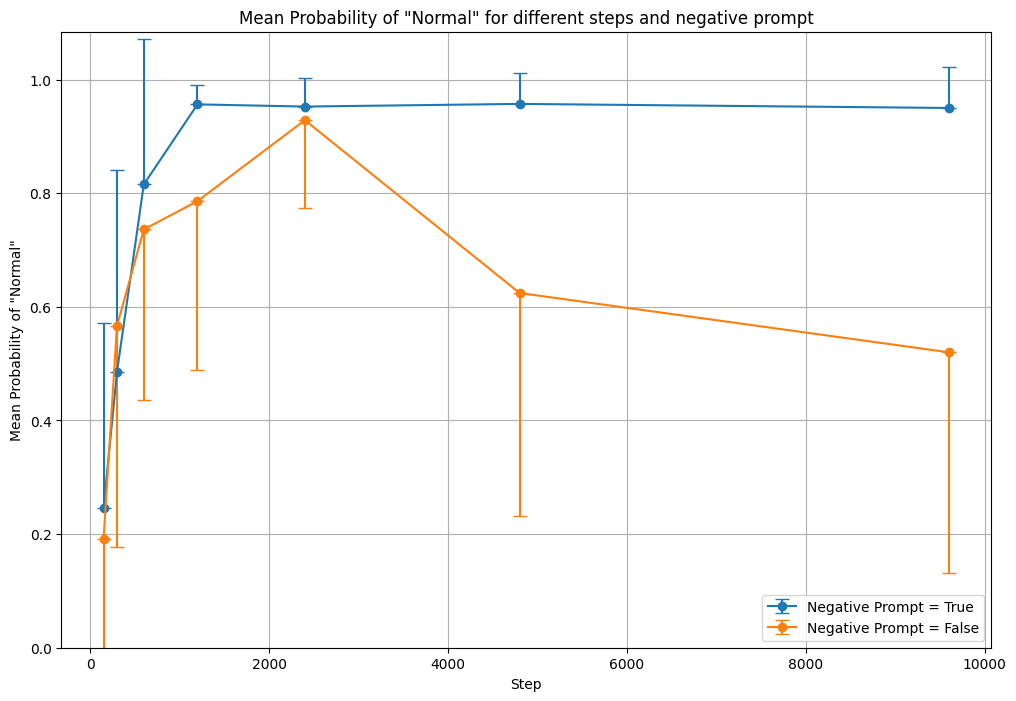

In [ ]:
import matplotlib.pyplot as plt

# Separate dataframes for negative_prompt == True and False
df_true = grouped_stats_df[grouped_stats_df['negative_prompt'] == True]
df_false = grouped_stats_df[grouped_stats_df['negative_prompt'] == False]

# Set y limit
ylim_max = max((df_true['mean'] + df_true['std']).max(), (df_false['mean'] + df_false['std']).max())

# Plotting with corrected error bars
plt.figure(figsize=(12, 8))

plt.errorbar(df_true['step'], df_true['mean'], yerr=[[0]*len(df_true['std']), df_true['std']],
             fmt='-o', capsize=5, label='Negative Prompt = True')
plt.errorbar(df_false['step'], df_false['mean'], yerr=[df_false['std'], [0]*len(df_false['std'])],
             fmt='-o', capsize=5, label='Negative Prompt = False')

plt.xlabel('Step')
plt.ylabel('Mean Probability of "Normal"')
plt.ylim(0, ylim_max)
plt.legend()
plt.grid(True)
plt.title('Mean Probability of "Normal" for different steps and negative prompt')
plt.show()



#**FID scoreを用いた画質の評価**

FID for Pytorch
https://github.com/mseitzer/pytorch-fid

FID scoreとは？？
https://data-analytics.fun/2021/12/31/understanding-fid/

In [2]:
!pip install pytorch_fid


In [ ]:
!unzip "/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/画像生成/generated_normal.zip" -d "/content/generated_normal"

In [4]:
# Resize images to 299x299 pixcels
from PIL import Image
from tqdm import tqdm
import os

def resize_images(folder_path, size=(299, 299)):
    files_to_resize = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".png") or file.endswith(".jpg"):
                files_to_resize.append(os.path.join(root, file))

    for file_path in tqdm(files_to_resize, desc=f'Resizing images in {folder_path}'):
        img = Image.open(file_path)
        img_resized = img.resize(size)
        img_resized.save(file_path)

# Resize images in the 'true' folder
true_folder = '/content/generated_normal/generated_normal/GroundTruth'
resize_images(true_folder)

# Resize images in other folders
parent_folder = '/content/generated_normal/generated_normal'
folders = os.listdir(parent_folder)
for folder in folders:
    if folder == 'GroundTruth':
        continue
    other_folder = os.path.join(parent_folder, folder)
    resize_images(other_folder)

Resizing images in /content/generated_normal/generated_normal/GroundTruth: 100%|██████████| 342/342 [00:06<00:00, 55.73it/s]
Resizing images in /content/generated_normal/generated_normal/step150: 100%|██████████| 100/100 [00:06<00:00, 15.33it/s]
Resizing images in /content/generated_normal/generated_normal/step300: 100%|██████████| 100/100 [00:06<00:00, 14.63it/s]
Resizing images in /content/generated_normal/generated_normal/step4800: 100%|██████████| 100/100 [00:07<00:00, 13.44it/s]
Resizing images in /content/generated_normal/generated_normal/step1200: 100%|██████████| 100/100 [00:07<00:00, 13.64it/s]
Resizing images in /content/generated_normal/generated_normal/step9600: 100%|██████████| 100/100 [00:07<00:00, 13.89it/s]
Resizing images in /content/generated_normal/generated_normal/step2400: 100%|██████████| 100/100 [00:07<00:00, 14.09it/s]
Resizing images in /content/generated_normal/generated_normal/step150_negative: 100%|██████████| 100/100 [00:05<00:00, 19.31it/s]
Resizing images

In [8]:
import os
import pandas as pd

# Path to the folder with the real images
true_images_folder = '/content/generated_normal/generated_normal/GroundTruth'

# Path to the parent folder of the generated images
parent_folder = '/content/generated_normal/generated_normal'

# Get a list of all folders in the parent folder
folders = os.listdir(parent_folder)

# Create an empty dataframe to store FID scores
fid_scores = pd.DataFrame(columns=['folder', 'fid_score'])

for folder in folders:
    if folder == 'true':
        continue
    other_folder = os.path.join(parent_folder, folder)

    # Calculate the FID score
    fid_score_output = !python -m pytorch_fid {true_folder} {other_folder}  # Note: replace this with your FID calculation command
    fid_score_text = fid_score_output[-1]  # Get the last line, which contains the FID score
    fid_score = float(fid_score_text.split(':')[1].strip())  # Extract and convert the FID score to a float

    fid_score = round(fid_score, 2) #round FID value to two decimal places

    # Add the FID score to the dataframe
    print(f"{folder}: {fid_score}")
    current_score = pd.DataFrame({'folder': [folder], 'fid_score': [fid_score]})
    fid_scores = pd.concat([fid_scores, current_score], ignore_index=True)

# Print the dataframe
print(fid_scores)

100% 7/7 [00:02<00:00,  2.38it/s]
100% 2/2 [00:00<00:00,  2.91it/s]
FID:  222.91608734156614
step150: 222.92
step300: 212.06
step4800: 231.58
step1200: 183.49
step9600: 207.1
step2400: 182.05
GroundTruth: -0.0
step150_negative: 216.73
step600_negative: 173.92
step300_negative: 207.88
step600: 186.26
step4800_negative: 191.79
step2400_negative: 184.74
step1200_negative: 202.6
step9600_negative: 175.83
               folder  fid_score
0             step150     222.92
1             step300     212.06
2            step4800     231.58
3            step1200     183.49
4            step9600     207.10
5            step2400     182.05
6         GroundTruth      -0.00
7    step150_negative     216.73
8    step600_negative     173.92
9    step300_negative     207.88
10            step600     186.26
11  step4800_negative     191.79
12  step2400_negative     184.74
13  step1200_negative     202.60
14  step9600_negative     175.83


In [9]:
fid_scores

,folder,fid_score
0,step150,222.92
1,step300,212.06
2,step4800,231.58
3,step1200,183.49
4,step9600,207.10
5,step2400,182.05
6,GroundTruth,-0.00
7,step150_negative,216.73
8,step600_negative,173.92
9,step300_negative,207.88


In [11]:
# Drop GroundTruth from fid_scores
fid_scores = fid_scores[fid_scores['folder'] != 'GroundTruth']

# Extract the step number and whether the row is negative into new columns
fid_scores['step'] = fid_scores['folder'].str.extract('(\d+)').astype(int)
fid_scores['negative'] = fid_scores['folder'].str.contains('negative')

# Sort by the new columns
fid_scores_sorted = fid_scores.sort_values(['step', 'negative'])

# Reset the index of the sorted DataFrame
fid_scores_sorted = fid_scores_sorted.reset_index(drop=True)

# Print the sorted DataFrame
fid_scores_sorted


,folder,fid_score,step,negative
0,step150,222.92,150,False
1,step150_negative,216.73,150,True
2,step300,212.06,300,False
3,step300_negative,207.88,300,True
4,step600,186.26,600,False
5,step600_negative,173.92,600,True
6,step1200,183.49,1200,False
7,step1200_negative,202.60,1200,True
8,step2400,182.05,2400,False
9,step2400_negative,184.74,2400,True


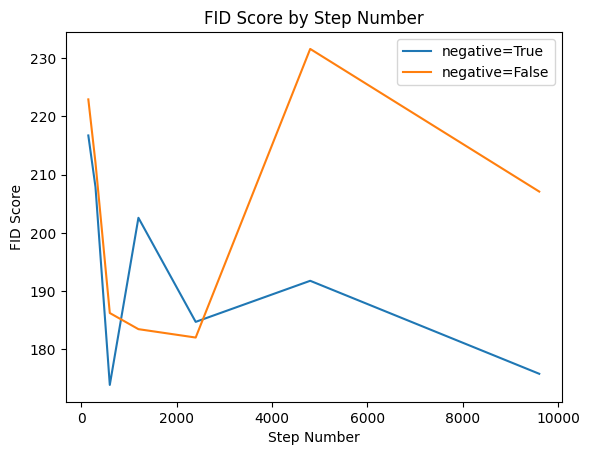

In [12]:
import matplotlib.pyplot as plt

# Create a figure and an axis
fig, ax = plt.subplots()

# For each value of 'negative'
for negative in [True, False]:
    # Select the rows where 'negative' is the current value
    subset = fid_scores_sorted[fid_scores_sorted['negative'] == negative]
    # Plot 'step' vs 'fid_score' for the selected rows
    ax.plot(subset['step'], subset['fid_score'], label=f'negative={negative}')

# Add title and labels
ax.set_title('FID Score by Step Number')
ax.set_xlabel('Step Number')
ax.set_ylabel('FID Score')

# Add a legend
ax.legend()

# Display the plot
plt.show()


#**人力評価用データセットの作成**

In [ ]:
!unzip "/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/画像生成/generated_normal.zip" -d "/content/generated_normal"

#**サマリー画像作成**

フォルダ内の画像からランダムで9枚選択して隙間なく配置（学会発表、論文用）

In [ ]:
import os

base_dir = 'C:\\Users\\CorneAI\\Desktop\\角膜翼状片画像生成\\123mai'
#base_dir = 'C:\\Users\\CorneAI\\Desktop\\角膜正常画像生成'
folders = [os.path.join(base_dir, d) for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

folders.append(r"C:\Users\CorneAI\sd-scripts\TrainingData_pterygium\train_image_768px")
folders

In [ ]:
base_dir = 'C:\\Users\\CorneAI\\Desktop\\角膜正常画像生成'
folders = ['C:\\Users\\CorneAI\\Desktop\\角膜正常画像生成\\step1200',
 'C:\\Users\\CorneAI\\Desktop\\角膜正常画像生成\\step1200_negative',
 'C:\\Users\\CorneAI\\Desktop\\角膜正常画像生成\\step150',
 'C:\\Users\\CorneAI\\Desktop\\角膜正常画像生成\\step150_negative',
 'C:\\Users\\CorneAI\\Desktop\\角膜正常画像生成\\step2400',
 'C:\\Users\\CorneAI\\Desktop\\角膜正常画像生成\\step2400_negative',
 'C:\\Users\\CorneAI\\Desktop\\角膜正常画像生成\\step300',
 'C:\\Users\\CorneAI\\Desktop\\角膜正常画像生成\\step300_negative',
 'C:\\Users\\CorneAI\\Desktop\\角膜正常画像生成\\step4800',
 'C:\\Users\\CorneAI\\Desktop\\角膜正常画像生成\\step4800_negative',
 'C:\\Users\\CorneAI\\Desktop\\角膜正常画像生成\\step600',
 'C:\\Users\\CorneAI\\Desktop\\角膜正常画像生成\\step600_negative',
 'C:\\Users\\CorneAI\\Desktop\\角膜正常画像生成\\step9600',
 'C:\\Users\\CorneAI\\Desktop\\角膜正常画像生成\\step9600_negative',
 'C:\\Users\\CorneAI\\Desktop\\角膜正常画像生成\\GroundTruth'
  ]
folders


###**3x3の配列**

In [ ]:
import os
import random
from PIL import Image

def create_mosaic(folder_path, output_folder, num_images=9, grid_size=3):
    # Get a list of all the image files in the folder
    images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Check if there are enough images in the folder
    if len(images) < num_images:
        print(f"Folder {folder_path} does not contain enough images. Skipping this folder.")
        return

    # Randomly select num_images from the list of images
    selected_images = random.sample(images, num_images)

    # Open the images
    image_objects = [Image.open(os.path.join(folder_path, img)) for img in selected_images]

    # Create a new blank image with dimensions to hold the 3x3 array of the images
    mosaic = Image.new('RGB', (image_objects[0].width * grid_size, image_objects[0].height * grid_size))

    # Paste the images into the new image in a 3x3 grid
    for i in range(grid_size):
        for j in range(grid_size):
            mosaic.paste(image_objects[i * grid_size + j], (i * image_objects[0].width, j * image_objects[0].height))

    # Save the new image
    mosaic_path = os.path.join(output_folder, f"mosaic_{os.path.basename(folder_path)}.png")
    mosaic.save(mosaic_path)

    print(f"Mosaic image saved at: {mosaic_path}")

folders = folders
output_folder = base_dir

for folder in folders:
    create_mosaic(folder, output_folder)


####**3x1の配列**

In [ ]:
import os
import random
from PIL import Image
from IPython.display import display

def create_mosaic(folder_path, output_folder, num_images=3, grid_size=(3,1)):
    # Get a list of all the image files in the folder
    images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Check if there are enough images in the folder
    if len(images) < num_images:
        print(f"Folder {folder_path} does not contain enough images. Skipping this folder.")
        return

    # Randomly select num_images from the list of images
    selected_images = random.sample(images, num_images)

    # Open the images
    image_objects = [Image.open(os.path.join(folder_path, img)) for img in selected_images]

    # Create a new blank image with dimensions to hold the grid of the images
    mosaic = Image.new('RGB', (image_objects[0].width * grid_size[1], image_objects[0].height * grid_size[0]))

    # Paste the images into the new image in a grid
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            mosaic.paste(image_objects[i * grid_size[1] + j], (j * image_objects[0].width, i * image_objects[0].height))

    # Save the new image
    mosaic_path = os.path.join(output_folder, f"mosaic_{os.path.basename(folder_path)}.png")
    mosaic.save(mosaic_path)

    print(f"Mosaic image saved at: {mosaic_path}")

    # Display the image in Jupyter notebook
    #display(Image.open(mosaic_path))

folders = folders
output_folder = base_dir

for folder in folders:
    create_mosaic(folder, output_folder)
